In [13]:
import pandas as pd

tc = True
file_path_h2=f"h2{'tc' if tc else ''}.csv"
file_path_h3=f"h3{'tc' if tc else ''}.csv"

# Correctly loading the CSV files using ';' as the separator
h2_data = pd.read_csv(file_path_h2, sep=';')
h3_data = pd.read_csv(file_path_h3, sep=';')

# Now, let's filter out the records according to the specified conditions and count them.

# 1. For h2 data, exclude records that response_code is different than 200
count_h2_bad_response = h2_data[h2_data['response_code'] != 200].shape[0]

# 2. For h3 data, exclude records that used http_version different than 3
count_h3_bad_response = h3_data[h3_data['response_code'] != 200].shape[0]
count_h3_wrong_version = h3_data[h3_data['http_version'] != 3].shape[0]

# Filtering out the excluded records from the datasets
h2_data_filtered = h2_data[h2_data['response_code'] == 200]
h3_data_filtered = h3_data[(h3_data['http_version'] == 3) & (h3_data['response_code'] == 200)]


comparison_new_mean_values = pd.DataFrame(
  {
    'H2 Mean Values (Filtered)': h2_data_filtered.drop(["size_download","iteration","fileName"], axis=1).mean(), 
    'H3 Mean Values (Filtered)': h3_data_filtered.drop(["size_download","iteration","fileName"], axis=1).mean()
  }
)

# Counts of excluded records
print("Bad response H2: ", count_h2_bad_response);
print("Bad response H3: ", count_h3_bad_response);
print("Bad protocol H3: ", count_h3_wrong_version);
comparison_new_mean_values


Bad response H2:  4
Bad response H3:  0
Bad protocol H3:  367


,H2 Mean Values (Filtered),H3 Mean Values (Filtered)
response_code,200.000000,200.000000
http_version,2.000000,3.000000
speed_download,5049.943989,5600.296781
speed_upload,0.000000,0.000000
time_starttransfer,2.334741,2.034951
time_pretransfer,1.820095,1.593019
time_appconnect,1.819944,1.587182
time_total,2.355818,2.069166
time_connect,1.285000,1.017706


# Bar chart

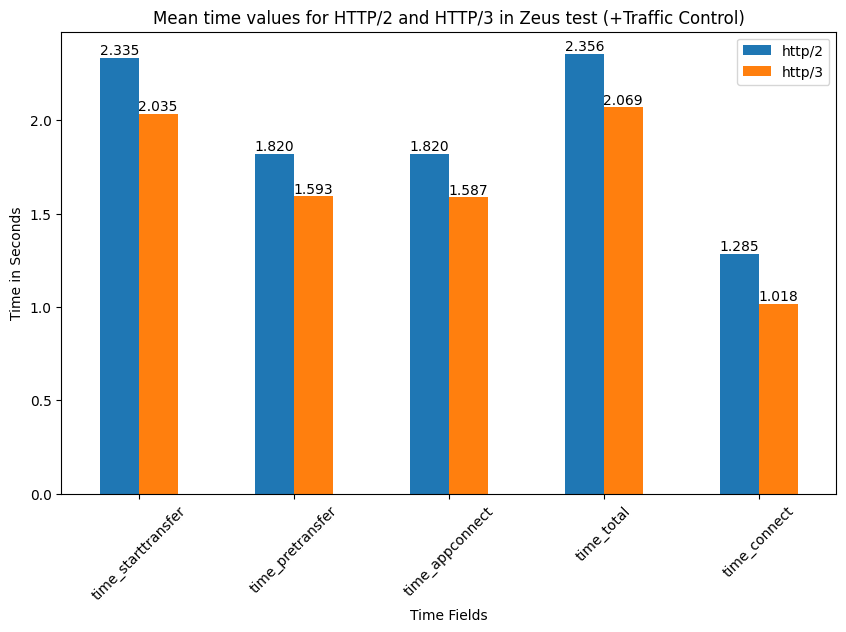

In [14]:
import matplotlib.pyplot as plt

# Extracting time related fields for both datasets
time_fields = ['time_starttransfer', 'time_pretransfer', 'time_appconnect', 'time_total', 'time_connect']

# Extracting these fields from both datasets
h2_times = h2_data_filtered[time_fields]
h3_times = h3_data_filtered[time_fields]

# Simplifying the approach to plot aggregated mean values of time fields for both h2 and h3 datasets

# Calculating mean values of time fields for both datasets
mean_times_h2 = h2_times.mean()
mean_times_h3 = h3_times.mean()

# Creating a new DataFrame for plotting
mean_times_df = pd.DataFrame({'http/2': mean_times_h2, 'http/3': mean_times_h3})

# Adding exact mean values above the bars in the chart

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
mean_times_df.plot(kind='bar', ax=ax)
plt.xlabel('Time Fields')
plt.ylabel('Time in Seconds')
plt.title(f'Mean time values for HTTP/2 and HTTP/3 in Zeus test{" (+Traffic Control)" if tc else ""}')
plt.xticks(rotation=45)

# Adding mean values above the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', label_type='edge')

plt.show()

# Histogram

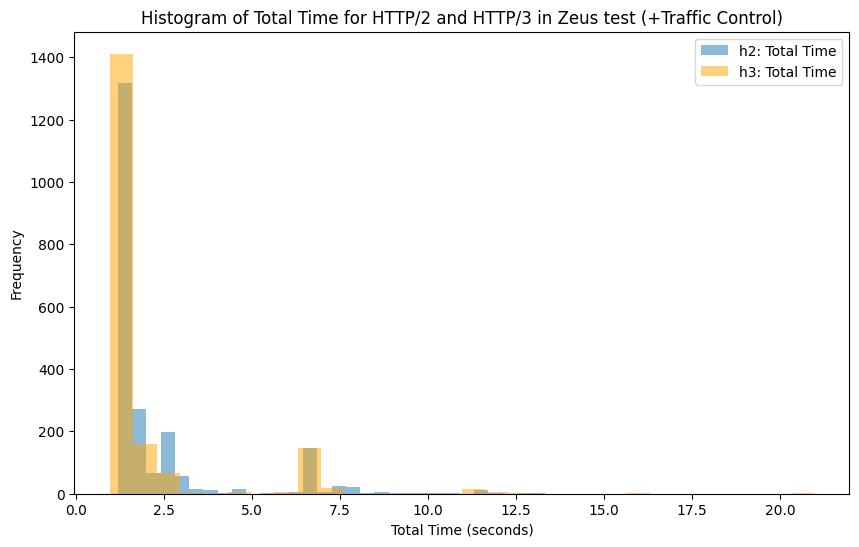

In [15]:
# Creating a histogram to compare the 'time_total' for both h2 and h3 datasets

fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for h2 data
ax.hist(h2_data_filtered['time_total'], bins=30, alpha=0.5, label='h2: Total Time')

# Histogram for h3 data
ax.hist(h3_data_filtered['time_total'], bins=30, alpha=0.5, label='h3: Total Time', color='orange')

ax.set_title(f'Histogram of Total Time for HTTP/2 and HTTP/3 in Zeus test{" (+Traffic Control)" if tc else ""}')
ax.set_xlabel('Total Time (seconds)')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()
